In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [16]:
dataset = pd.read_csv('creditcard.csv')

In [17]:
# Standardize the 'Amount' feature
sc = StandardScaler()
dataset['normalizedAmount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset = dataset.drop(['Amount'], axis=1)

In [18]:
# Drop the 'Time' column
dataset = dataset.drop(['Time'], axis=1)

In [19]:
# Separate features and target variable
X = dataset.iloc[:, dataset.columns != 'Class'].values
y = dataset.iloc[:, dataset.columns == 'Class'].values


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\rajesh veturi\AppData\Local\Temp\ipykernel_12764\359653031.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


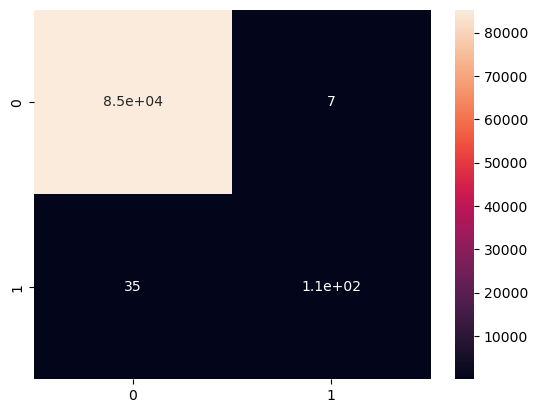

In [21]:
# Initialize and train the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Predict on the test set and calculate confusion matrix
y_pred = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

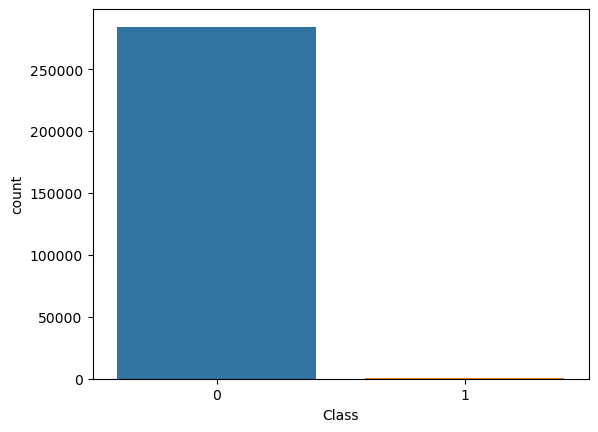

In [22]:

# Plot the count of classes in the dataset
sns.countplot(x='Class', data=dataset)
plt.show()

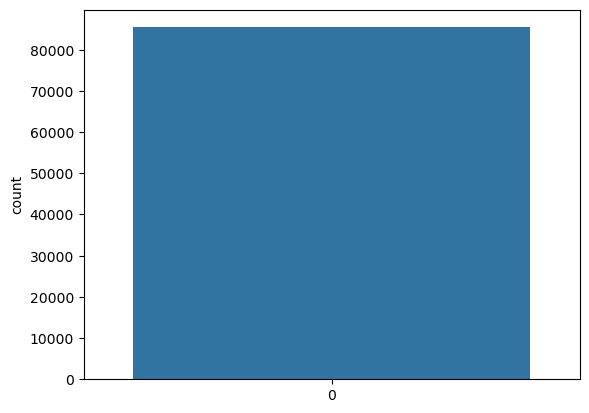

In [26]:
# Perform oversampling using SMOTE
from imblearn.over_sampling import SMOTE

# Perform oversampling using SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

y_test = np.concatenate(y_test)

# Plot the count of classes after oversampling
sns.countplot(y_test)
plt.show()

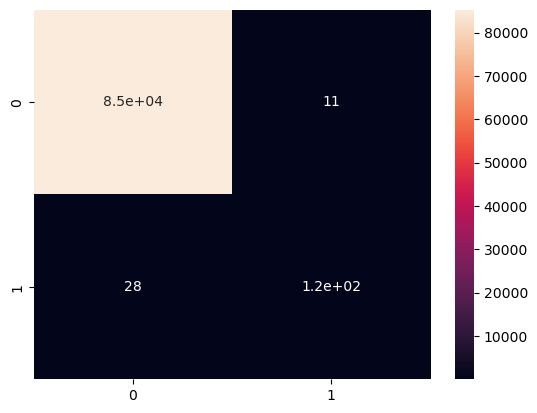

In [28]:
# Train the random forest classifier with the resampled data
random_forest_resampled = RandomForestClassifier(n_estimators=100)
random_forest_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set and calculate confusion matrix
y_pred = random_forest_resampled.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix after oversampling
sns.heatmap(cm, annot=True)
plt.show()


In [29]:
# Print classification report for the resampled data
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
# Calculate and print the ROC AUC score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9046974234263204


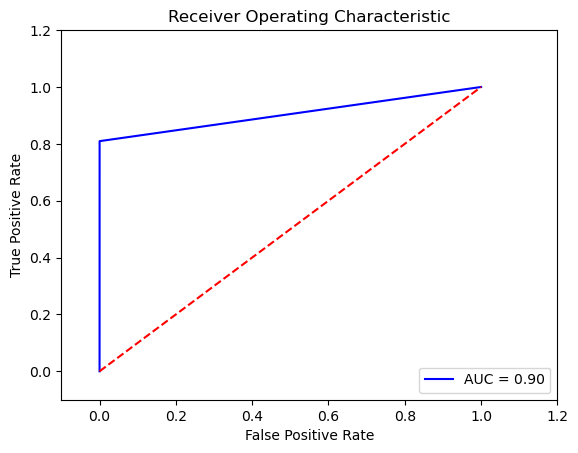

In [31]:
# Plot the Receiver Operating Characteristic (ROC) curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()